In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

In [2]:
titles = ['Stranger Things', 'The Crown', 'Black Mirror', 'The Office', 'Breaking Bad', 'Wednesday', 'Narcos', 'BoJack Horseman']
genres = ['Sci-Fi', 'Drama', 'Crime', 'Comedy', 'Thriller']
devices = ['Mobile', 'TV', 'Tablet', 'Laptop']
statuses = ['Active', 'Cancelled']

In [3]:
rows = []

for _ in range(200):
    user_id = random.randint(1000, 1050)
    title = random.choice(titles)
    genre = random.choice(genres)
    watch_date = datetime(2024, 11, 1) + timedelta(days=random.randint(0, 29))
    duration = random.randint(20, 120)  # dakika
    device = random.choice(devices)
    status = random.choice(statuses)

    rows.append([user_id, title, genre, watch_date.date(), duration, device, status])

In [4]:
df = pd.DataFrame(rows, columns=['UserID', 'Title', 'Genre', 'WatchDate', 'Duration', 'Device', 'SubscriptionStatus'])

In [5]:
df.to_csv('netflix_watch_data.csv', index=False)

In [6]:
pd.read_csv("netflix_watch_data.csv")

,UserID,Title,Genre,WatchDate,Duration,Device,SubscriptionStatus
0,1045,BoJack Horseman,Crime,2024-11-27,54,Laptop,Active
1,1002,The Office,Drama,2024-11-20,72,Tablet,Active
2,1005,BoJack Horseman,Drama,2024-11-20,66,TV,Cancelled
3,1023,The Office,Drama,2024-11-05,36,Laptop,Cancelled
4,1042,Black Mirror,Comedy,2024-11-13,98,Tablet,Active
...,...,...,...,...,...,...,...
195,1043,Wednesday,Comedy,2024-11-13,82,Mobile,Active
196,1014,Breaking Bad,Crime,2024-11-06,69,Laptop,Cancelled
197,1022,The Crown,Thriller,2024-11-28,34,Tablet,Active
198,1031,Stranger Things,Thriller,2024-11-03,55,TV,Cancelled


In [7]:
df.head()

,UserID,Title,Genre,WatchDate,Duration,Device,SubscriptionStatus
0,1045,BoJack Horseman,Crime,2024-11-27,54,Laptop,Active
1,1002,The Office,Drama,2024-11-20,72,Tablet,Active
2,1005,BoJack Horseman,Drama,2024-11-20,66,TV,Cancelled
3,1023,The Office,Drama,2024-11-05,36,Laptop,Cancelled
4,1042,Black Mirror,Comedy,2024-11-13,98,Tablet,Active


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UserID              200 non-null    int64 
 1   Title               200 non-null    object
 2   Genre               200 non-null    object
 3   WatchDate           200 non-null    object
 4   Duration            200 non-null    int64 
 5   Device              200 non-null    object
 6   SubscriptionStatus  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


In [9]:
df.isnull().sum()

UserID                0
Title                 0
Genre                 0
WatchDate             0
Duration              0
Device                0
SubscriptionStatus    0
dtype: int64

In [10]:
df['WatchDate'] = pd.to_datetime(df['WatchDate'])  

<Axes: title={'center': 'En Çok İzlenen İçerikler'}, xlabel='Title'>

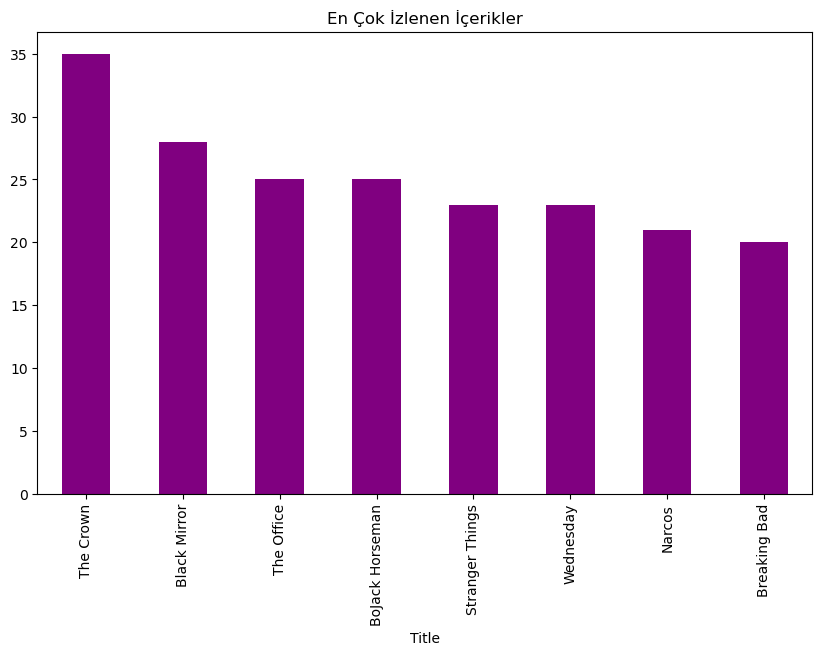

In [11]:
df['Title'].value_counts().head(10).plot(kind='bar', title="En Çok İzlenen İçerikler", figsize=(10,6), color='purple')

<Axes: title={'center': 'Türlere Göre Ortalama İzleme Süresi'}, xlabel='Genre'>

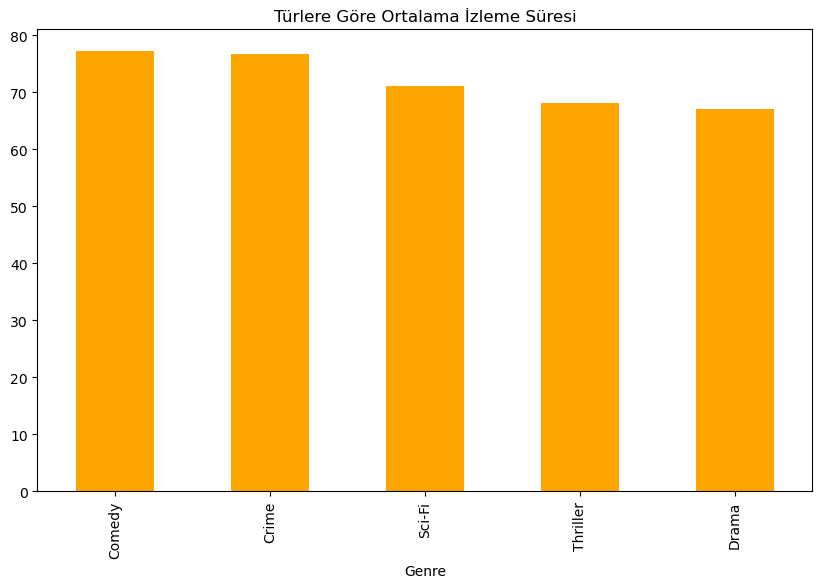

In [12]:
df.groupby('Genre')['Duration'].mean().sort_values(ascending=False).plot(
    kind='bar', title='Türlere Göre Ortalama İzleme Süresi', figsize=(10,6), color='orange'
)

<Axes: title={'center': 'Cihaza Göre Dağılım'}, ylabel='count'>

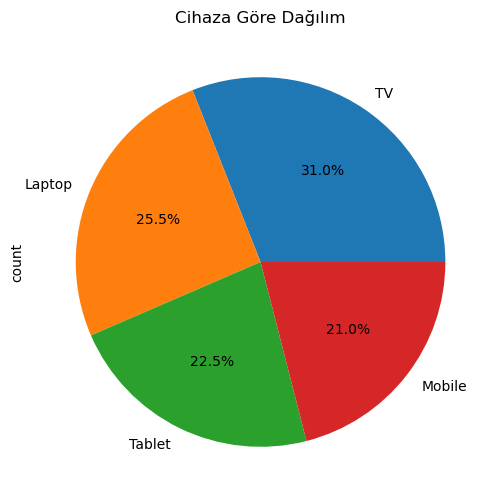

In [13]:
df['Device'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Cihaza Göre Dağılım")

<Axes: title={'center': 'Günlük İzlenme Sayısı'}, xlabel='WatchDate'>

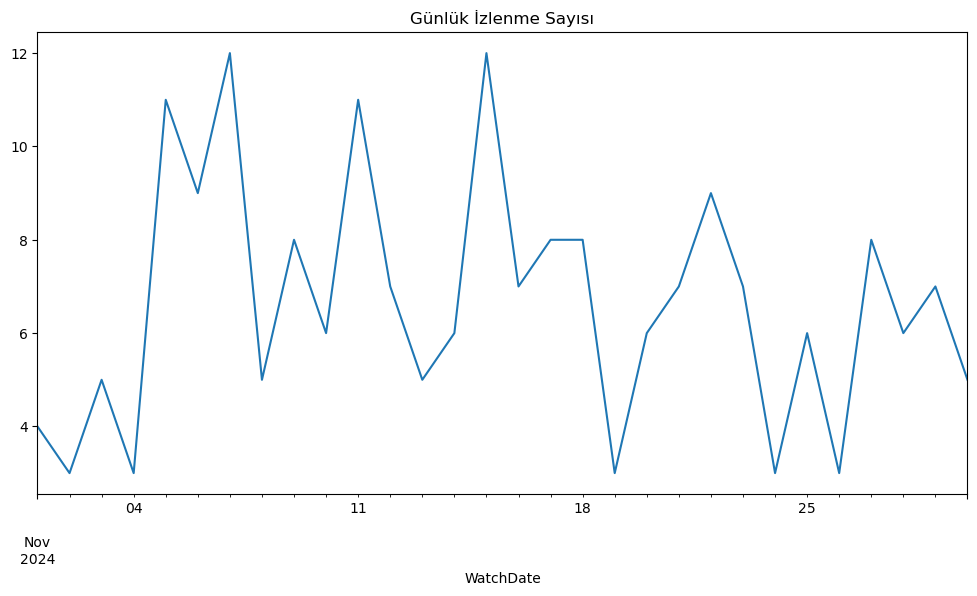

In [14]:
df['WatchDate'].value_counts().sort_index().plot(
    kind='line', figsize=(12,6), title="Günlük İzlenme Sayısı"
)

In [15]:
df.groupby('UserID')['Duration'].mean().sort_values(ascending=False).head()

UserID
1003    92.666667
1046    92.250000
1024    92.000000
1006    91.800000
1044    91.000000
Name: Duration, dtype: float64

<Axes: title={'center': 'Abonelik Durum Dağılımı'}, xlabel='SubscriptionStatus'>

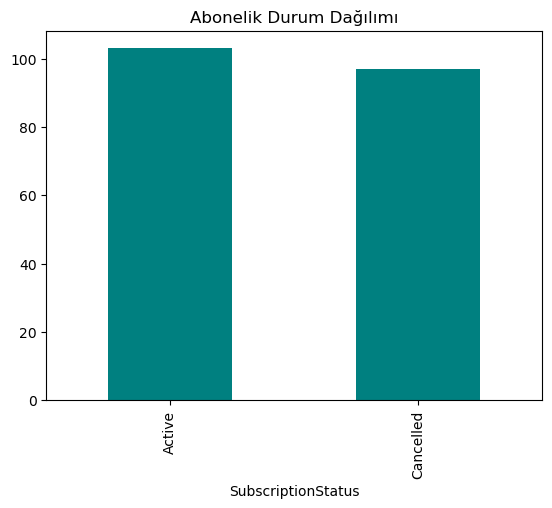

In [16]:
df['SubscriptionStatus'].value_counts().plot(kind='bar', title="Abonelik Durum Dağılımı", color='teal')

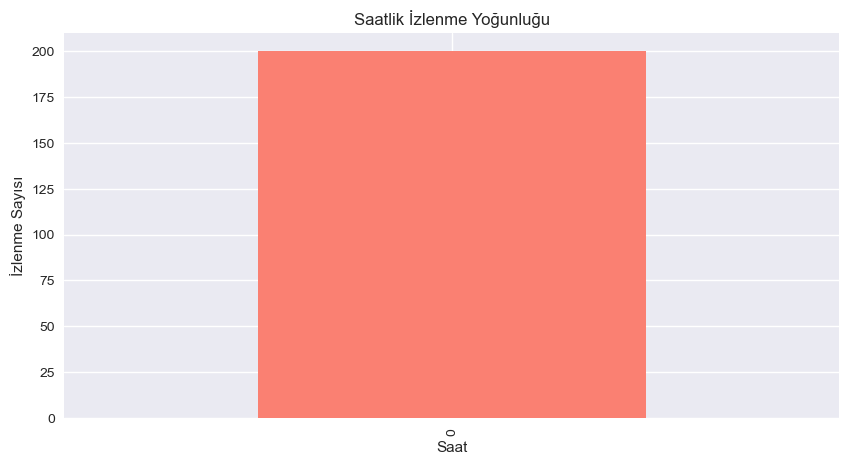

In [23]:
df['Hour'] = df['WatchDate'].dt.hour

df['Hour'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(10,5),
    color='salmon',
    title='Saatlik İzlenme Yoğunluğu'
)
plt.xlabel('Saat')
plt.ylabel('İzlenme Sayısı')
plt.show()

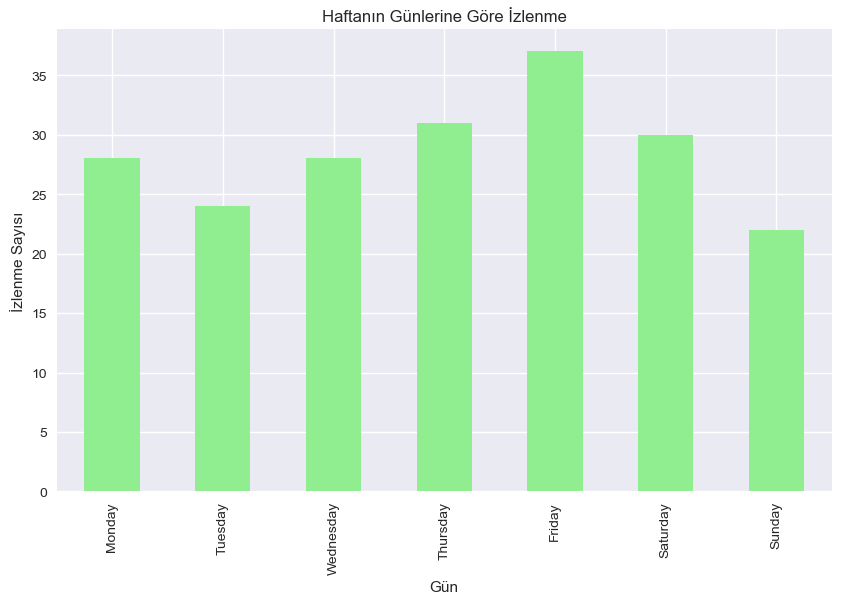

In [24]:
df['DayOfWeek'] = df['WatchDate'].dt.day_name()

df['DayOfWeek'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(
    kind='bar',
    figsize=(10,6),
    color='lightgreen',
    title='Haftanın Günlerine Göre İzlenme'
)
plt.xlabel('Gün')
plt.ylabel('İzlenme Sayısı')
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  

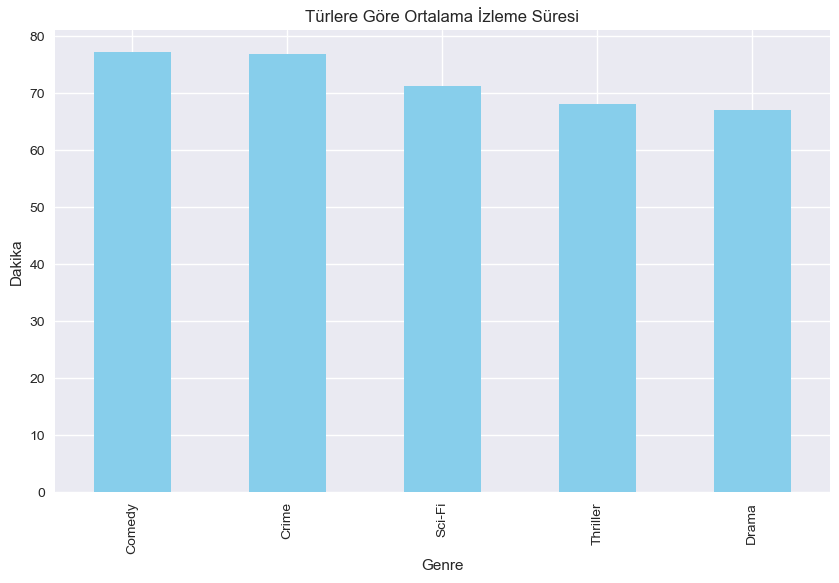

In [26]:
df.groupby('Genre')['Duration'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,6),
    color='skyblue',
    title='Türlere Göre Ortalama İzleme Süresi'
)
plt.ylabel('Dakika')
plt.show()

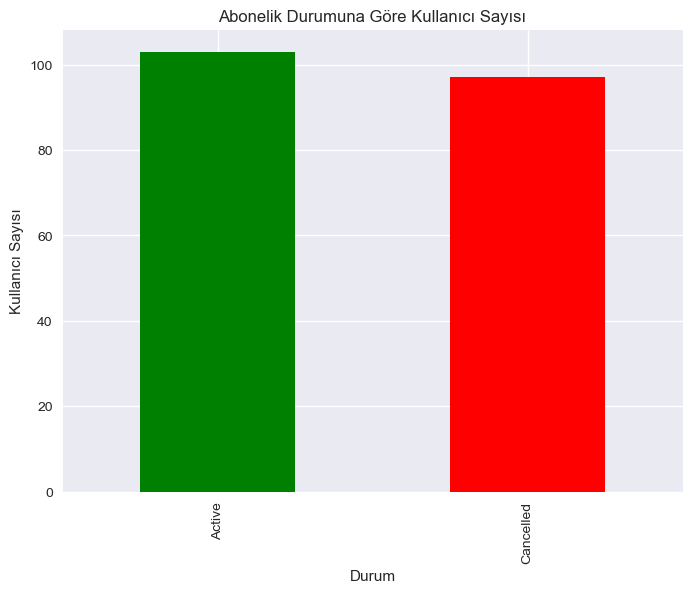

In [27]:
df['SubscriptionStatus'].value_counts().plot(
    kind='bar',
    figsize=(8,6),
    color=['green', 'red'],
    title='Abonelik Durumuna Göre Kullanıcı Sayısı'
)
plt.xlabel('Durum')
plt.ylabel('Kullanıcı Sayısı')
plt.show()

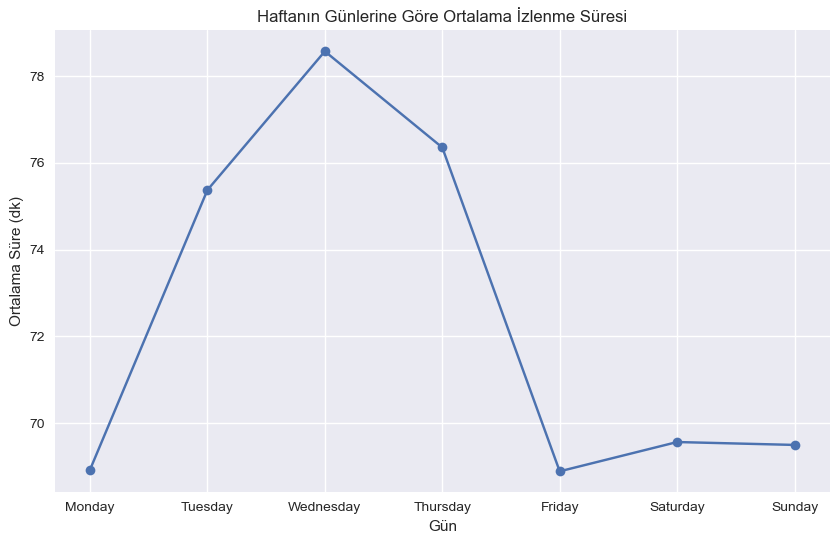

In [28]:
df.groupby('DayOfWeek')['Duration'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(
    kind='line',
    marker='o',
    figsize=(10,6),
    title='Haftanın Günlerine Göre Ortalama İzlenme Süresi'
)
plt.xlabel('Gün')
plt.ylabel('Ortalama Süre (dk)')
plt.grid(True)
plt.show()